## Submitted by:

- Rebeca Monis: 23103790
- Shelton Cyril K: 23103804


# Part 1: Logistic Regression


Logistic regression is a useful method for solving binary classification tasks. It is a special kind of linear regression that deals with categorical target variables. The term 'logistic' is derived from the logistic function it uses, the sigmoid function. The value of which lies between 0 and 1.
Steps involved in implementing logistic regression are:

1.  Import necessary libraries
2.  Initialise appropriate values for weights and biases
3.  Define an activation function: sigmoid function which takes in any real number and outputs a value between 0 and 1
4.  Define a loss function to evaluate how well the model is performing
5.  Define the forward pass where input data is taken and output data is calculated using weights and biases
6.  Define gradient descent where the gradient of the loss function is calculated based on the weights and biases then these weights and biases are updated.
7.  Define the predict function
8.  Train the model and evaluate the performance using approproate metrics.

Sources:

- https://realpython.com/logistic-regression-python/
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


In [62]:
from dataclasses import dataclass
from typing import List
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from sklearn.model_selection import train_test_split  # Import train_test_split function

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

random.seed(1337)
np.random.seed(1337)


class AlreadyInitializedError(Exception):
    pass

In [100]:
@dataclass
class LogisticRegressor:
    """Class which implements logistic regression
    weights -> array of weights as floats
    bias -> array of bias as floats
    l_r -> learning rate, default = 0.01
    its -> number of iterations, default = 0.01
    """

    weights: NDArray = None
    bias: NDArray = None
    _n_feat: int = None
    l_r: float = 1e-2
    its: int = 5000
    debug: bool = False
    _fitted: bool = False
    _n_rows: int = None
    _stop_thresh: float = 1e-4
    epoch_log: List[float] = None
    use_batch_gd: bool = False

    def _sigmo(_, z) -> float:
        return 1 / (1 + np.exp(-z))

    # batch gradient descent
    def _gd(self, X, y):
        for _ in range(self.its):
            y_h = 1 / (1 + np.exp(-(np.dot(X, self.weights) + self.bias)))
            delta_w = np.dot(X, (y_h - y)) / self._n_rows
            delta_b = np.sum(y_h - y) / self._n_rows
            self.weights -= self.l_r * delta_w
            self.bias -= self.l_r * delta_b
            loss = self._loss(y_h, y)
            self.epoch_log.append(loss)
            if np.abs(loss) <= self._stop_thresh:
                break

    def _rnd_ord(self, X, y):
        indices = np.random.randint(0, y.shape[0], self.its)
        return X[indices], y[indices]

    # Stochastic gradient descent
    def _sgd(self, X, y):
        s_X, s_y = self._rnd_ord(X, y)
        for i_X, i_y in zip(s_X, s_y):
            y_h = 1 / (1 + np.exp(-(np.dot(i_X, self.weights) + self.bias)))
            delta_y = y_h - i_y
            delta_w = i_X * delta_y
            delta_b = delta_y
            self.weights -= self.l_r * delta_w
            self.bias -= self.l_r * delta_b
            loss = self._loss(y_h, i_y)
            self.epoch_log.append(loss)
            if np.abs(loss) <= self._stop_thresh:
                break

    def _loss(_, y_h: List[float], y: List[float]):  # y and y_hat
        return -np.mean(y * np.log(y_h) + (1 - y) * np.log(1 - y_h))

    def init(self, X, y):
        self._n_feat = X.shape[1]
        self.weights = np.random.normal(0.0, 0.1, self._n_feat)
        self.bias = np.random.normal(0.0, 0.1, 1)
        self._n_rows = X.shape[0]
        self.epoch_log = list()

    def fit(self, X, y) -> None:
        if self._fitted:
            raise AlreadyInitializedError("Cannot fit an already fitted regressor.")
        self.init(X, y)
        if self.use_batch_gd:
            self._gd(X, y)
        else:
            self._sgd(X, y)

    def _pred(self, X):
        return 1 / (1 + np.exp(-(np.dot(X, self.weights) + self.bias)))

    def predict(self, X):
        return np.rint(self._pred(X))

    def stats(self):
        plt.plot(list(range(len(self.epoch_log))), self.epoch_log)
        plt.title("Training loss")
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.grid(True)
        plt.show()

# Part 2: Blobs and Circles datasets


## Blobs Dataset


In [101]:
csv_data_blobs = pd.read_csv("./blobs400.csv")
# Use pandas to read the CSV file as a dataframe
csv_data_circles = pd.read_csv("./circles500.csv")

# The y values are those labelled 'Class': extract their values
y_b = csv_data_blobs["Class"].values

# The x values are all other columns
del csv_data_blobs["Class"]  # drop the 'Class' column from the dataframe
X_b = csv_data_blobs.values  # convert the remaining columns to a numpy array
X_b

array([[ 1.41822079,  2.12437503, -0.43390534],
       [ 1.59040428,  0.93543417,  1.5103687 ],
       [ 2.31145761, -1.02666778,  1.03193048],
       ...,
       [ 1.41948992,  1.44676619,  1.32308371],
       [ 2.44456386,  3.86234226, -0.10337099],
       [ 3.00190416,  2.79313462, -0.12377066]])

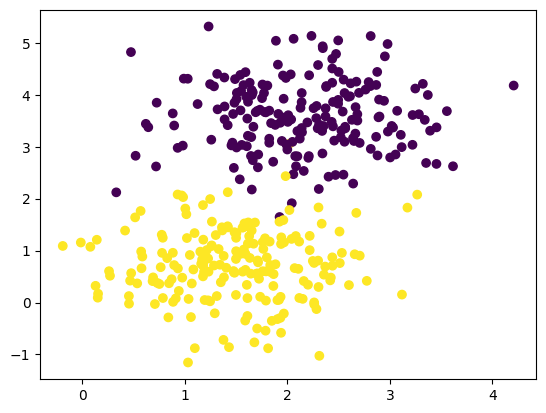

In [103]:
plt.scatter(X_b[:, 0], X_b[:, 1], c=y_b)

In [104]:
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_b, y_b, test_size=0.3, random_state=100)
X_val_b, X_test_b, y_val_b, y_test_b = train_test_split(X_val_b, y_val_b, test_size=0.5, random_state=100)

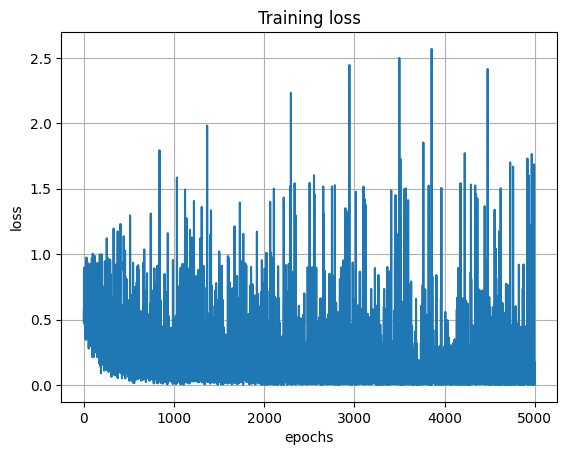

In [105]:
lr = LogisticRegressor()
lr.fit(X_train_b, y_train_b)
pred_m = lr.predict(X_test_b)
lr.stats()

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.96      0.98        25

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

0.9833333333333333


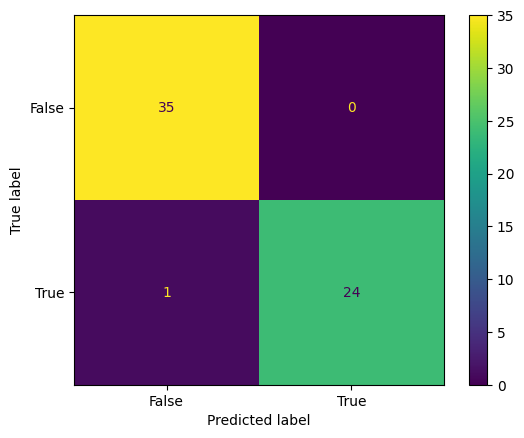

In [106]:
print("Classification Report: \n", classification_report(y_test_b, pred_m))
print(accuracy_score(y_test_b, pred_m))
cm = confusion_matrix(y_true=y_test_b, y_pred=pred_m)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()

## Circles Dataset


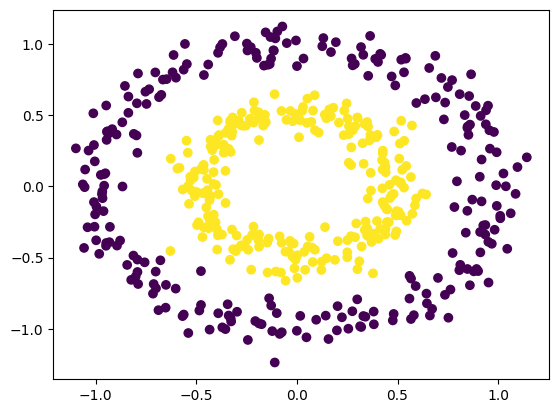

In [108]:
csv_data_circles = pd.read_csv("./circles500.csv")

# The y values are those labelled 'Class'
y_c = csv_data_circles["Class"].values

# The x values are all other columns
del csv_data_circles["Class"]  # Drop the 'Class' column from the dataframe
X_c = csv_data_circles.values  # Convert the remaining columns to a numpy array
plt.scatter(X_c[:, 0], X_c[:, 1], c=y_c)

In [109]:
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_c, y_c, test_size=0.3, random_state=100)
X_val_c, X_test_c, y_val_c, y_test_c = train_test_split(X_val_c, y_val_c, test_size=0.5, random_state=100)

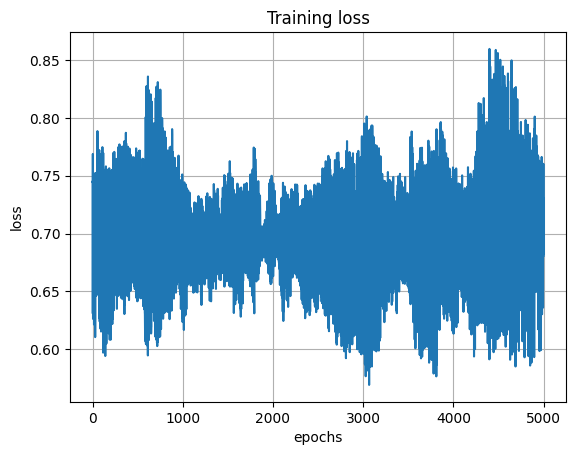

In [110]:
lr = LogisticRegressor()
lr.fit(X_train_c, y_train_c)
pred_m = lr.predict(X_test_c)
lr.stats()

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.54      0.48        35
           1       0.48      0.38      0.42        40

    accuracy                           0.45        75
   macro avg       0.46      0.46      0.45        75
weighted avg       0.46      0.45      0.45        75

0.4533333333333333


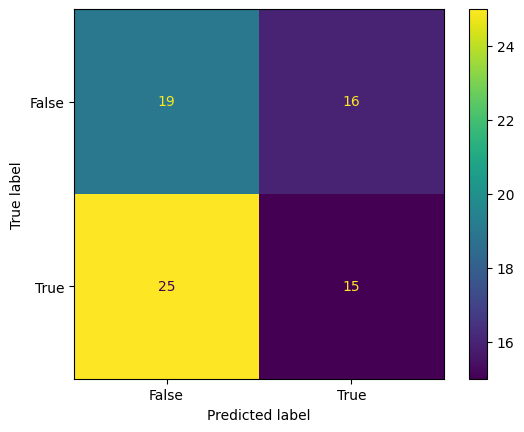

In [111]:
print("Classification Report: \n", classification_report(y_test_c, pred_m))
print(accuracy_score(y_test_c, pred_m))
cm = confusion_matrix(y_true=y_test_c, y_pred=pred_m)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()

The regression model is able to separate the two classes in the blobs dataset and results in an accuracy of 98.3%, whereas the circles dataset results in a 45.3% accuracy. This proves that logistic regression (linearity is to blame) might not be the best at capturing complexities and non linearity of data. Polynomial regression might prove to be more effective when it comes to non linear data.


# Part 3: Shallow Neural Network


Shallow Neural Networks are the foundation of all neural network theory and application due to their simple architecture featuring a single input layer, hidden layer and output layer. It is characterized by:

1.  Forward Propagation: The process of applying weights, biases and activation functions to the output layer through the hidden layer to calculate the output of the network.
2.  Activation Functions: Non-linearity is introduced using functions like sigmoid, RELU, tanh and this helps the network leran complex patterns.
3.  Back Propagation: Error is propagated backwards using algorithms like gradient descent and the weights and biases are updated to minimize differences between actual and predicted outputs, in short, to optimize the performance

Source:
https://medium.com/the-modern-scientist/shallow-neural-networks-bridging-complexity-and-simplicity-in-machine-learning-7a3443d2dc66#:~:text=Shallow%20neural%20networks%20employ%20forward,patterns%20beyond%20mere%20linear%20relationships.


In [112]:
# The sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# The sigmoid derivative function
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))


def loss_fn(actual_val, predicted_val):
    loss = -1 * ((actual_val * np.log(predicted_val + 1e-9)) + (1 - actual_val) * np.log(1 - predicted_val + 1e-9))
    return loss


def accuracy_fn(exp_true, train_pred):
    accy_percent = np.sum(exp_true == train_pred) / len(exp_true) * 100
    return accy_percent


def shallow_nn(train_dt, label_dt, epochs, l_rate):
    n_features = train_dt.shape[1]
    hidden_nodes = n_features + 2
    w1 = np.random.randn(n_features, hidden_nodes)
    b1 = np.zeros((1, hidden_nodes))
    w2 = np.random.randn(hidden_nodes, 1)
    b2 = np.zeros((1, 1))
    loss_ = []
    for i in range(epochs):
        for i, k in enumerate(train_dt):
            # forward propagation
            j = k.reshape((1, n_features))
            z1 = j @ w1 + b1
            a1 = sigmoid(z1)
            z2 = a1 @ w2 + b2
            a2 = sigmoid(z2)

            # Backward propagation
            delta_z2 = a2 - label_dt[i]  # get the error from predicted value to actual value

            l = loss_fn(label_dt[i], delta_z2)  # loss calculation

            delta_w2 = a1.T @ delta_z2
            delta_b2 = delta_z2
            delta_z1 = sigmoid_d(z1) * (delta_z2 @ w2.T)
            delta_w1 = j.T @ delta_z1
            delta_b1 = delta_z1

            # update weights and bias
            w1 -= l_rate * delta_w1
            b1 -= l_rate * delta_b1
            w2 -= l_rate * delta_w2
            b2 -= l_rate * delta_b2
            loss_.append(l)

    return w1, b1, w2, b2

In [55]:
def predict_nn(xdata, w1, w2, b1, b2):
    pred = []
    n_samples, n_features = xdata.shape
    for idx, j in enumerate(xdata):
        k = j.reshape((1, n_features))
        z1 = k @ w1 + b1
        a1 = sigmoid(z1)
        z2 = a1 @ w2 + b2
        a2 = sigmoid(z2)
        p = np.where(a2[0] >= 0.5, 1, 0)
        pred.append(p[0])
    return pred

In [56]:
w1, b1, w2, b2 = shallow_nn(X_val_b, y_val_b, 1000, 0.001)

pred_val = predict_nn(X_val_b, w1, w2, b1, b2)
print(
    "Accuracy for blob validation dataset:",
    round(accuracy_fn(y_val_b, np.array(pred_val)), 2),
)

pred_test = predict_nn(X_test_b, w1, w2, b1, b2)
print(
    "Accuracy for blob test dataset:",
    round(accuracy_fn(y_test_b, np.array(pred_test)), 2),
)

C:\Users\shelt\AppData\Local\Temp\ipykernel_24008\1902440771.py:12: RuntimeWarning: invalid value encountered in log
  loss = -1 * ((actual_val * np.log(predicted_val + 1e-9)) + (1 - actual_val) * np.log(1 - predicted_val + 1e-9))


Accuracy for blob validation dataset: 96.67
Accuracy for blob test dataset: 100.0


In [57]:
w1, b1, w2, b2 = shallow_nn(X_val_c, y_val_c, 1000, 0.001)

pred_val = predict_nn(X_val_c, w1, w2, b1, b2)
print(
    "Accuracy for circles validation dataset:",
    round(accuracy_fn(y_val_c, np.array(pred_val)), 2),
)

pred_test = predict_nn(X_test_c, w1, w2, b1, b2)
print(
    "Accuracy for circles test dataset:",
    round(accuracy_fn(y_test_c, np.array(pred_test)), 2),
)

C:\Users\shelt\AppData\Local\Temp\ipykernel_24008\1902440771.py:12: RuntimeWarning: invalid value encountered in log
  loss = -1 * ((actual_val * np.log(predicted_val + 1e-9)) + (1 - actual_val) * np.log(1 - predicted_val + 1e-9))


Accuracy for circles validation dataset: 56.0
Accuracy for circles test dataset: 56.0


# Part 4: Fashion MNIST classification for (Tshirt/Top and Shirt classes)


In [117]:
def load_mnist(path, kind="train"):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, "%s-labels-idx1-ubyte.gz" % kind)
    images_path = os.path.join(path, "%s-images-idx3-ubyte.gz" % kind)

    with gzip.open(labels_path, "rb") as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, "rb") as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

In [132]:
train_imgs, train_labels = load_mnist(".", "train")
label_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
class_index = np.where((train_labels == 0) | (train_labels == 6))
print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

Shape of images is (60000, 784), labels is (60000,)


In [124]:
train_imgs = train_imgs[class_index]
train_labels = train_labels[class_index]

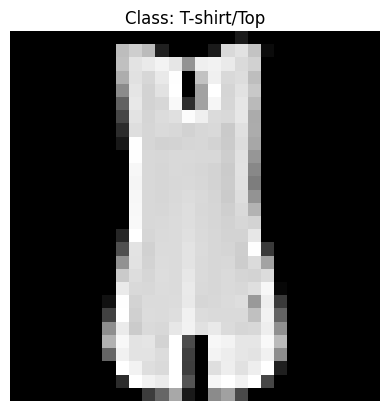

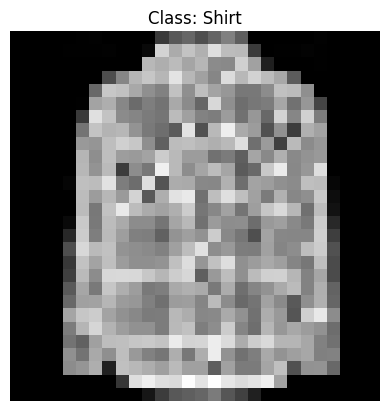

In [142]:
def visualise(data, index, title):
    # MM Jan 2019: Given an MNIST data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (28x28).

    picture = data[index]

    # Initially, the data is a 1D array of 784 pixels; reshape it to a 2D array of 28x28 pixels
    picture.shape = (28, 28)

    # Display it
    plt.imshow(picture, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


visualise(train_imgs[np.where(train_labels == 0)], np.random.randint(10), "Class: T-shirt/Top")
visualise(train_imgs[np.where(train_labels == 6)], np.random.randint(10), "Class: Shirt")

In [ ]:
img_feature_dataset = pd.DataFrame(train_imgs)
img_dataset_label = pd.DataFrame(train_labels)
img_feature_dataset["label"] = img_dataset_label


img_data = img_feature_dataset[(img_feature_dataset["label"] == 0) | (img_feature_dataset["label"] == 6)]

img_data["label"] = img_data["label"].replace(0, 1)
img_data["label"] = img_data["label"].replace(6, 0)

img_label_data = np.array(img_data["label"])

img_feature_data = np.array(img_data.drop(columns=["label"]).values)

x_train_img, y_train_img, x_test_img, y_test_img = train_test_split(img_feature_data, img_label_data, random_state=100, train_size=0.8, shuffle=True)

In [ ]:
# testing on image data
w11, b11, w22, b22 = shallow_nn(x_train_img, x_test_img, 1, 0.01)

predicted_labels = predict_nn(y_train_img, w11, w22, b11, b22)
print(
    "Accuracy for image test dataset:",
    round(accuracy_fn(y_test_img, np.array(predicted_labels)), 2),
)

<ipython-input-167-cbd40ec49a71>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-167-cbd40ec49a71>:9: RuntimeWarning: invalid value encountered in log
  loss = -1*((actual_val * np.log(predicted_val + 1e-9))


Accuracy for image test dataset: 78.71


# Part 5: Enhancements
